In [1]:
pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read data from two CSV files into separate DataFrames
df1 = pd.read_csv("movie_data_part1.csv")
df2 = pd.read_csv("movie_data_part2.csv")

In [4]:
df1

,Image Link,Name of movie,Year of release,Certificate,Runtime (min),Genre,Rating,MetaScore,Votes,Grosses,Description,Director,Stars
0,https://m.media-amazon.com/images/M/MV5BNDE3OD...,The Shawshank Redemption,1994,A,142,Drama,9.3,82,"2,797,507",$28.34M,"Over the course of several years, two convicts...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
1,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,84,"2,778,489",$534.86M,When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."
2,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148,"Action, Adventure, Sci-Fi",8.8,74,"2,466,695",$292.58M,A thief who steals corporate secrets through t...,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio..."
3,https://m.media-amazon.com/images/M/MV5BODQ0OW...,Fight Club,1999,A,139,Drama,8.8,67,"2,231,343",$37.03M,An insomniac office worker and a devil-may-car...,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf, Zach Grenier"
4,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154,"Crime, Drama",8.9,95,"2,145,836",$107.93M,"The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,https://m.media-amazon.com/images/M/MV5BMmZiYj...,House of Games,1987,U,102,"Crime, Thriller",7.2,78,"23,437",$2.59M,A psychiatrist comes to the aid of a compulsiv...,David Mamet,"Lindsay Crouse, Joe Mantegna, Mike Nussbaum, L..."
4896,https://m.media-amazon.com/images/M/MV5BYTQyZG...,Umberto D.,1952,NaN,89,Drama,8.2,92,"27,291",$0.07M,An elderly man and his dog struggle to survive...,Vittorio De Sica,"Carlo Battisti, Maria Pia Casilio, Lina Gennar..."
4897,https://m.media-amazon.com/images/M/MV5BMjIwNj...,The Women,I) (2008,UA,114,"Comedy, Drama",5.0,27,"22,540",$26.90M,A wealthy New Yorker wrestles with the decisio...,Diane English,"Meg Ryan, Eva Mendes, Annette Bening, Debra Me..."
4898,https://m.media-amazon.com/images/M/MV5BMTk3NT...,Aliens in the Attic,2009,U,86,"Adventure, Comedy, Family",5.4,42,"23,653",$25.20M,A group of kids must protect their vacation ho...,John Schultz,"Ashley Tisdale, Robert Hoffman, Carter Jenkins..."


In [5]:
df2

,Image Link,Name of movie,Year of release,Certificate,Runtime (min),Genre,Rating,MetaScore,Votes,Grosses,Description,Director,Stars
0,https://m.media-amazon.com/images/M/MV5BMTUyND...,The Stanford Prison Experiment,2015,R,122,"Biography, Drama, History",6.8,67,"45,122",$0.64M,"In 1971, twenty-four male students are selecte...",Kyle Patrick Alvarez,"Ezra Miller, Tye Sheridan, Billy Crudup, Olivi..."
1,https://m.media-amazon.com/images/M/MV5BYzgyOD...,Capricorn One,1977,NaN,123,"Action, Adventure, Drama",6.8,38,"23,964",*****,When the first manned flight to Mars is deemed...,Peter Hyams,"Elliott Gould, James Brolin, Brenda Vaccaro, S..."
2,https://m.media-amazon.com/images/M/MV5BZmYwYW...,The Last Seduction,1994,R,110,"Crime, Drama, Romance",7.0,85,"25,025",$6.14M,A devious sexpot steals her husband's drug mon...,John Dahl,"Linda Fiorentino, Peter Berg, Bill Pullman, Mi..."
3,https://m.media-amazon.com/images/M/MV5BMmM4Yz...,House on Haunted Hill,1959,NaN,75,"Crime, Horror, Mystery",6.8,^^^^^^,"29,460",*****,"A millionaire offers $10,000 to five people wh...",William Castle,"Vincent Price, Carol Ohmart, Richard Long, Ala..."
4,https://m.media-amazon.com/images/M/MV5BNjAxOG...,Local Hero,1983,NaN,111,"Comedy, Drama",7.3,84,"25,853",$5.90M,An American oil company has plans for a new re...,Bill Forsyth,"Burt Lancaster, Peter Riegert, Fulton Mackay, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,https://m.media-amazon.com/images/M/MV5BOGI3Ym...,The Sixth Man,1997,PG-13,107,"Comedy, Drama, Fantasy",5.6,^^^^^^,"6,180",$14.71M,A college athlete returns from the dead to hel...,Randall Miller,"Marlon Wayans, Kadeem Hardison, David Paymer, ..."
4896,https://m.media-amazon.com/images/M/MV5BNjFmMT...,Vincere,2009,NaN,128,"Biography, Drama, Romance",6.8,85,"5,798",$0.62M,"The story of Mussolini's secret lover, Ida Dal...",Marco Bellocchio,"Giovanna Mezzogiorno, Filippo Timi, Fausto Rus..."
4897,https://m.media-amazon.com/images/M/MV5BMTQ5OT...,Die Feuerzangenbowle,1944,NaN,97,Comedy,7.7,^^^^^^,"6,415",*****,"A successful writer, home-schooled in his yout...",Helmut Weiss,"Heinz Rühmann, Karin Himboldt, Hilde Sessak, E..."
4898,https://m.media-amazon.com/images/M/MV5BZjYyZD...,Gloria,1999,A,108,"Crime, Drama, Thriller",5.1,26,"6,090",$4.16M,After serving three years in prison covering f...,Sidney Lumet,"Sharon Stone, Jean-Luke Figueroa, Jeremy North..."


In [6]:
# Concatenate two DataFrames (df1 and df2) vertically along the rows
# Setting ignore_index to True reassigns new sequential index values
df = pd.concat([df1, df2], axis=0, ignore_index=True)


In [7]:
# Replace "^^^^^^" with NaN in the DataFrame
df = df.replace("^^^^^^", np.nan)

# Replace "*****" with NaN in the DataFrame
df = df.replace("*****", np.nan)


In [8]:
df

,Image Link,Name of movie,Year of release,Certificate,Runtime (min),Genre,Rating,MetaScore,Votes,Grosses,Description,Director,Stars
0,https://m.media-amazon.com/images/M/MV5BNDE3OD...,The Shawshank Redemption,1994,A,142,Drama,9.3,82,"2,797,507",$28.34M,"Over the course of several years, two convicts...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
1,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,84,"2,778,489",$534.86M,When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."
2,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148,"Action, Adventure, Sci-Fi",8.8,74,"2,466,695",$292.58M,A thief who steals corporate secrets through t...,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio..."
3,https://m.media-amazon.com/images/M/MV5BODQ0OW...,Fight Club,1999,A,139,Drama,8.8,67,"2,231,343",$37.03M,An insomniac office worker and a devil-may-car...,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf, Zach Grenier"
4,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154,"Crime, Drama",8.9,95,"2,145,836",$107.93M,"The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,https://m.media-amazon.com/images/M/MV5BOGI3Ym...,The Sixth Man,1997,PG-13,107,"Comedy, Drama, Fantasy",5.6,NaN,"6,180",$14.71M,A college athlete returns from the dead to hel...,Randall Miller,"Marlon Wayans, Kadeem Hardison, David Paymer, ..."
9796,https://m.media-amazon.com/images/M/MV5BNjFmMT...,Vincere,2009,NaN,128,"Biography, Drama, Romance",6.8,85,"5,798",$0.62M,"The story of Mussolini's secret lover, Ida Dal...",Marco Bellocchio,"Giovanna Mezzogiorno, Filippo Timi, Fausto Rus..."
9797,https://m.media-amazon.com/images/M/MV5BMTQ5OT...,Die Feuerzangenbowle,1944,NaN,97,Comedy,7.7,NaN,"6,415",NaN,"A successful writer, home-schooled in his yout...",Helmut Weiss,"Heinz Rühmann, Karin Himboldt, Hilde Sessak, E..."
9798,https://m.media-amazon.com/images/M/MV5BZjYyZD...,Gloria,1999,A,108,"Crime, Drama, Thriller",5.1,26,"6,090",$4.16M,After serving three years in prison covering f...,Sidney Lumet,"Sharon Stone, Jean-Luke Figueroa, Jeremy North..."


In [9]:
# Count the number of missing values (NaN) in each column of the DataFrame
missing_values_count = df.isnull().sum()


Image Link            0
Name of movie         0
Year of release       0
Certificate        2283
Runtime (min)         0
Genre                 0
Rating                0
MetaScore          2464
Votes                 0
Grosses            2406
Description           0
Director              0
Stars                 2
dtype: int64

In [10]:
df.dtypes

Image Link          object
Name of movie       object
Year of release     object
Certificate         object
Runtime (min)        int64
Genre               object
Rating             float64
MetaScore           object
Votes               object
Grosses             object
Description         object
Director            object
Stars               object
dtype: object

In [11]:
# Change the data type of the 'MetaScore' column to float64
df["MetaScore"] = df["MetaScore"].astype('float64')

# Remove '$' and 'M', and change the data type of the 'Grosses' column to float64
df['Grosses'] = df['Grosses'].str.replace('$', '').str.replace('M', '').astype(float) * 1e6

# Remove commas and change the data type of the 'Votes' column to float64
df["Votes"] = df["Votes"].str.replace(",", "").astype('float64')

# Extract the year and change the data type of the 'Year of release' column to float64
df["Year of release"] = df["Year of release"].str.extract('(\d+)').astype('float64')


In [12]:
# Fill null values in the 'Certificate' column with the mode (most common value)
df["Certificate"] = df["Certificate"].fillna(df["Certificate"].mode()[0])

# Fill null values in the 'MetaScore' column with the mean (average) value
df["MetaScore"] = df["MetaScore"].fillna(df["MetaScore"].mean())

# Fill null values in the 'Grosses' column with the mean (average) value
df["Grosses"] = df["Grosses"].fillna(df["Grosses"].mean())


In [13]:
# Rename the 'Grosses' column to 'Gross in $'
df.rename(columns={"Grosses": "Gross in $"}, inplace=True)

# Modify the 'Genre' column to sort and join genres with commas
df['Genre'] = df['Genre'].apply(lambda x: ', '.join(sorted(x.split(', '))))


In [14]:
# drop the null value of Stars column
df.dropna(subset=["Stars"], inplace=True)


In [28]:
# Add a new column 'Rating Category' based on rating values
df['Rating Category'] = df['Rating'].apply(lambda x: 'Low Rating' if x >= 1 and x <= 5 else ('Medium Rating' if x > 5 and x <= 7 else 'High Rating'))


In [29]:
df

,Image Link,Name of movie,Year of release,Certificate,Runtime (min),Genre,Rating,MetaScore,Votes,Gross in $,Description,Director,Stars,Cluster,Rating Category
0,https://m.media-amazon.com/images/M/MV5BNDE3OD...,The Shawshank Redemption,1994.0,A,142,Drama,9.3,82.000000,2797507.0,2.834000e+07,"Over the course of several years, two convicts...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",1,High Rating
1,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152,"Action, Crime, Drama",9.0,84.000000,2778489.0,5.348600e+08,When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",1,High Rating
2,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010.0,UA,148,"Action, Adventure, Sci-Fi",8.8,74.000000,2466695.0,2.925800e+08,A thief who steals corporate secrets through t...,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",1,High Rating
3,https://m.media-amazon.com/images/M/MV5BODQ0OW...,Fight Club,1999.0,A,139,Drama,8.8,67.000000,2231343.0,3.703000e+07,An insomniac office worker and a devil-may-car...,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf, Zach Grenier",1,High Rating
4,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994.0,A,154,"Crime, Drama",8.9,95.000000,2145836.0,1.079300e+08,"The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson,...",1,High Rating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,https://m.media-amazon.com/images/M/MV5BOGI3Ym...,The Sixth Man,1997.0,PG-13,107,"Comedy, Drama, Fantasy",5.6,57.249591,6180.0,1.471000e+07,A college athlete returns from the dead to hel...,Randall Miller,"Marlon Wayans, Kadeem Hardison, David Paymer, ...",0,Medium Rating
9796,https://m.media-amazon.com/images/M/MV5BNjFmMT...,Vincere,2009.0,R,128,"Biography, Drama, Romance",6.8,85.000000,5798.0,6.200000e+05,"The story of Mussolini's secret lover, Ida Dal...",Marco Bellocchio,"Giovanna Mezzogiorno, Filippo Timi, Fausto Rus...",0,Medium Rating
9797,https://m.media-amazon.com/images/M/MV5BMTQ5OT...,Die Feuerzangenbowle,1944.0,R,97,Comedy,7.7,57.249591,6415.0,3.358819e+07,"A successful writer, home-schooled in his yout...",Helmut Weiss,"Heinz Rühmann, Karin Himboldt, Hilde Sessak, E...",0,High Rating
9798,https://m.media-amazon.com/images/M/MV5BZjYyZD...,Gloria,1999.0,A,108,"Crime, Drama, Thriller",5.1,26.000000,6090.0,4.160000e+06,After serving three years in prison covering f...,Sidney Lumet,"Sharon Stone, Jean-Luke Figueroa, Jeremy North...",0,Medium Rating


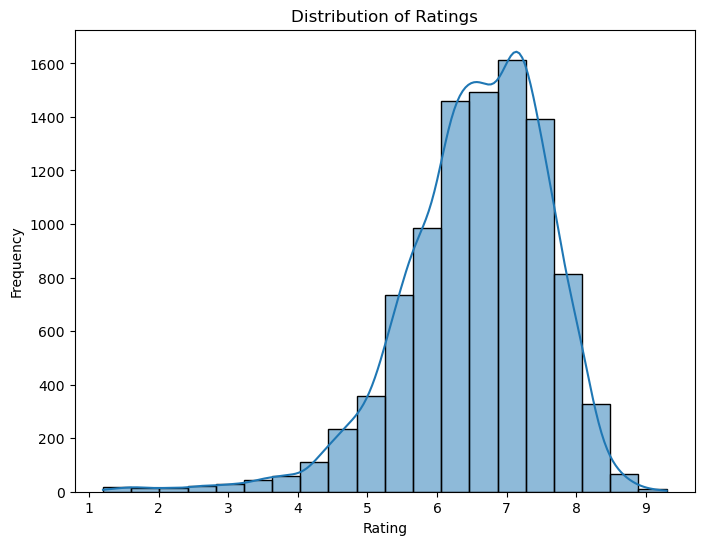

In [16]:
# Data Visualization (histogram of the 'Rating' column)
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()


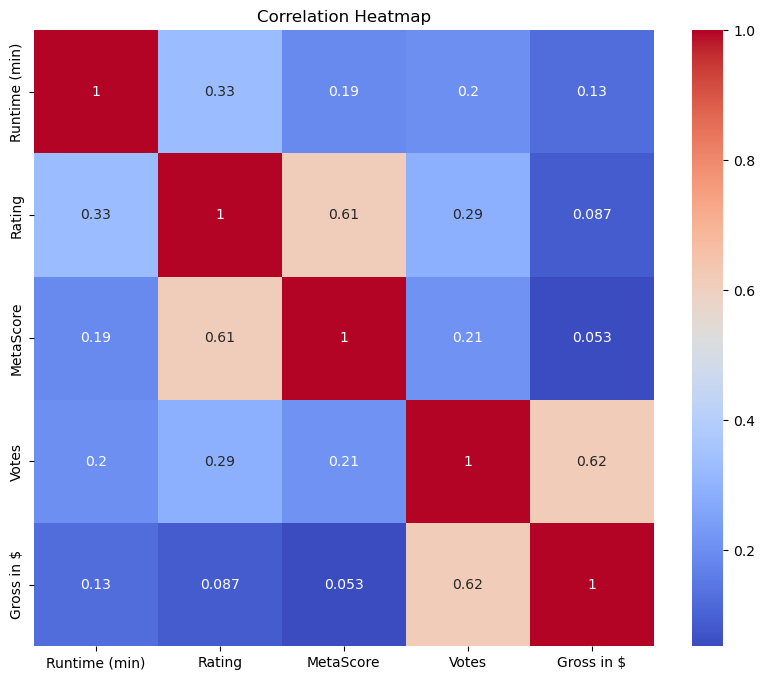

In [17]:
num_columns = [ "Runtime (min)", "Rating", "MetaScore", "Votes", "Gross in $"]
subset_df = df[num_columns]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Create a heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [18]:
# Hypothesis Testing (t-test for Rating between different years)
from scipy.stats import ttest_ind
year_1994 = df[df['Year of release'] == 1994]['Rating']
year_2008 = df[df['Year of release'] == 2008]['Rating']
t_stat, p_value = ttest_ind(year_1994, year_2008)
print(f'Test Statistic: {t_stat}')
print(f'P-value: {p_value}')

Test Statistic: 1.026821922106727
P-value: 0.3049492306443501


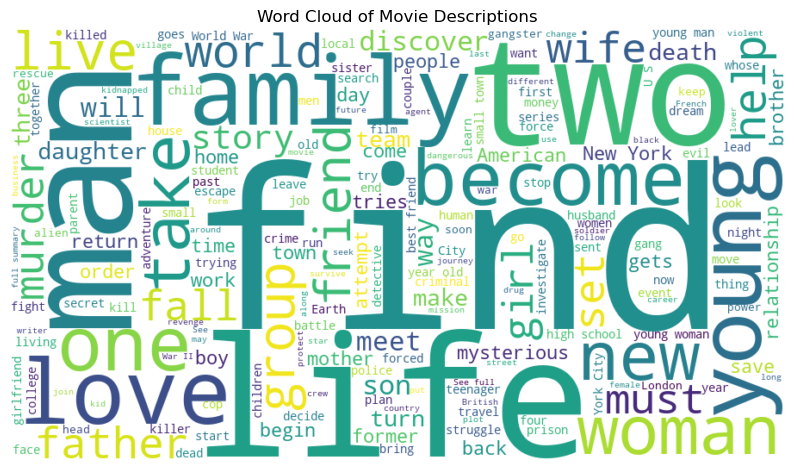

In [19]:
# Text Analysis (word cloud of movie descriptions)
from wordcloud import WordCloud

wordcloud = WordCloud(width=900, height=500, background_color='white').generate(' '.join(df['Description'].dropna()))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Descriptions')
plt.show()

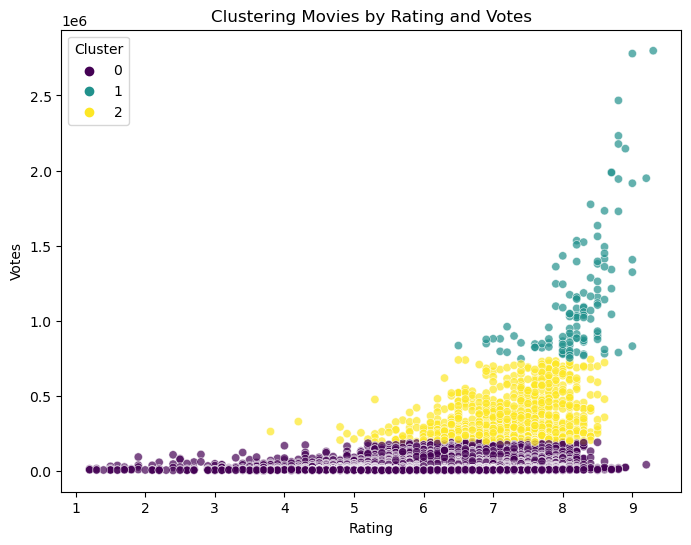

In [20]:
# Clustering (clustering movies based on ratings and votes)
from sklearn.cluster import KMeans

X = df[['Rating', 'Votes']]
kmeans = KMeans(n_clusters=3).fit(X)
df['Cluster'] = kmeans.labels_


# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Rating', y='Votes', hue='Cluster', palette='viridis', alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Clustering Movies by Rating and Votes')
plt.show()

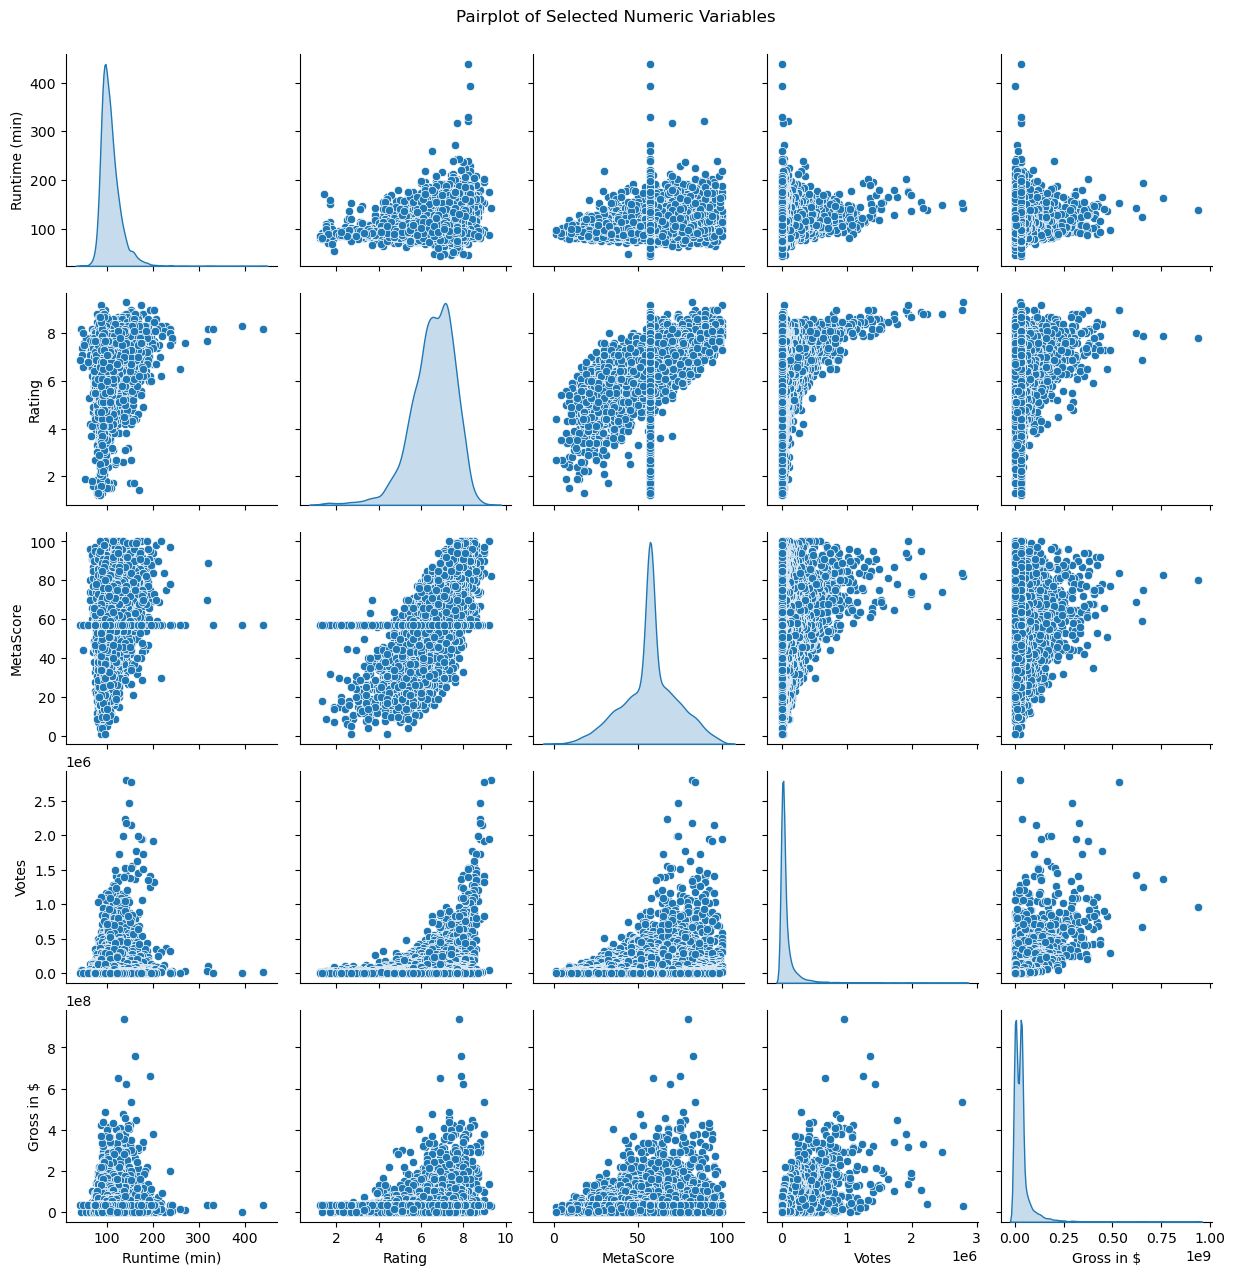

In [21]:
# Pairplot of selected numeric variables
sns.pairplot(df[num_columns], diag_kind='kde')
plt.suptitle('Pairplot of Selected Numeric Variables', y=1.02)
plt.show()


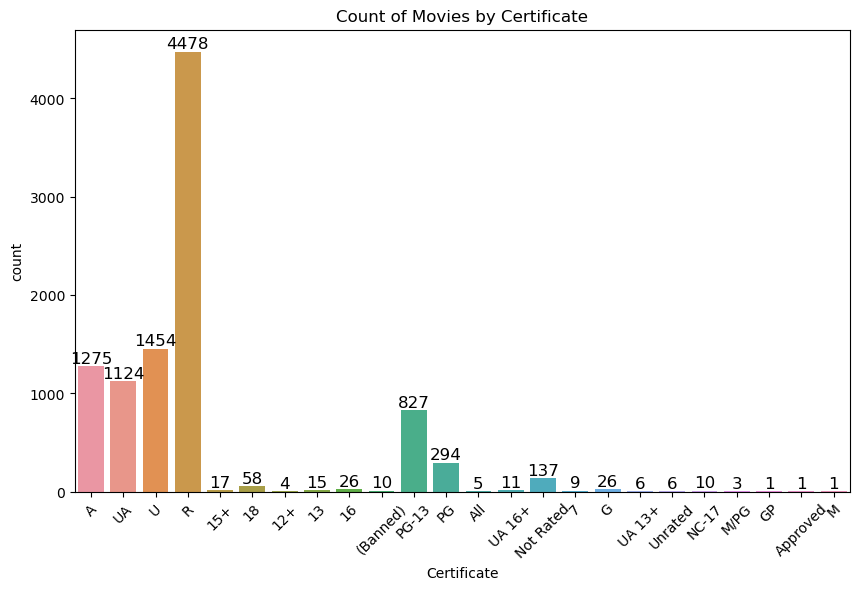

In [22]:
# Count plot for 'Certificate' column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Certificate')
plt.title('Count of Movies by Certificate')
plt.xticks(rotation=45)

# Add counts on top of the bars
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', fontsize=12, color='black')

plt.show()

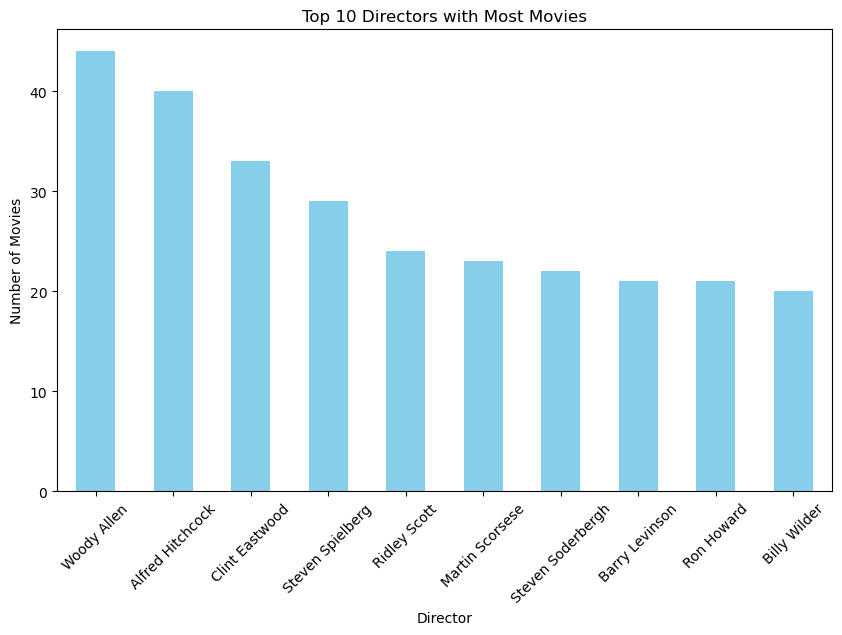

In [23]:
# Count movies by director
director_counts = df['Director'].value_counts().head(10)

# Plot a bar chart
plt.figure(figsize=(10, 6))
director_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.title('Top 10 Directors with Most Movies')
plt.xticks(rotation=45)
plt.show()



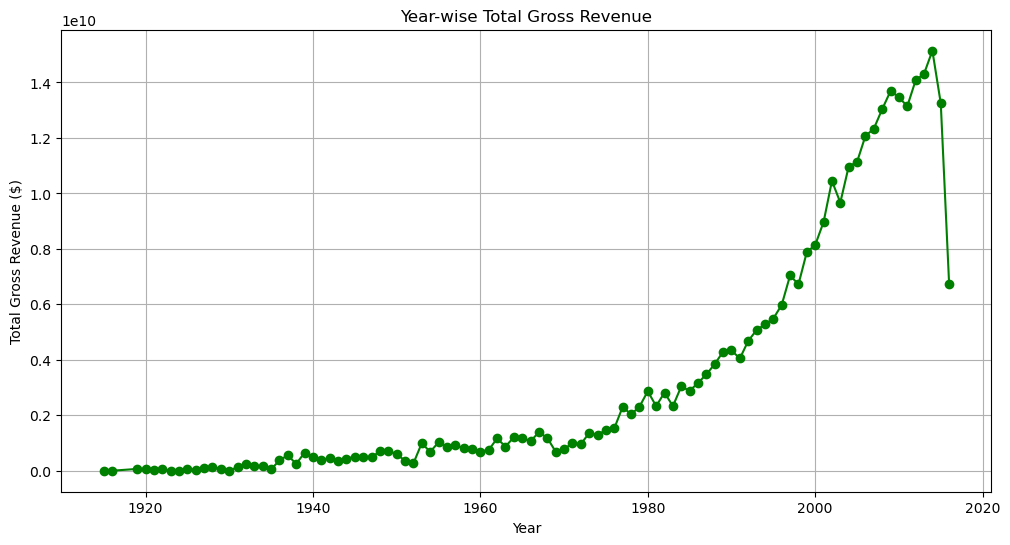

In [24]:
# Group by year and calculate total gross revenue
year_revenue = df.groupby('Year of release')['Gross in $'].sum()

# Plot a line chart
plt.figure(figsize=(12, 6))
year_revenue.plot(kind='line', marker='o', color='green')
plt.xlabel('Year')
plt.ylabel('Total Gross Revenue ($)')
plt.title('Year-wise Total Gross Revenue')
plt.grid(True)
plt.show()


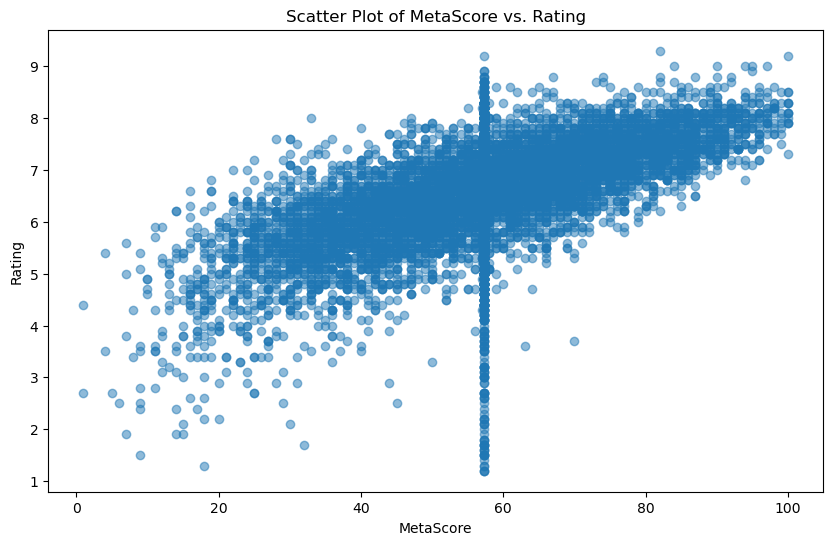

In [25]:
# Create a scatter plot of MetaScore vs. Rating
plt.figure(figsize=(10, 6))
plt.scatter(df['MetaScore'], df['Rating'], alpha=0.5)
plt.xlabel('MetaScore')
plt.ylabel('Rating')
plt.title('Scatter Plot of MetaScore vs. Rating')
plt.show()


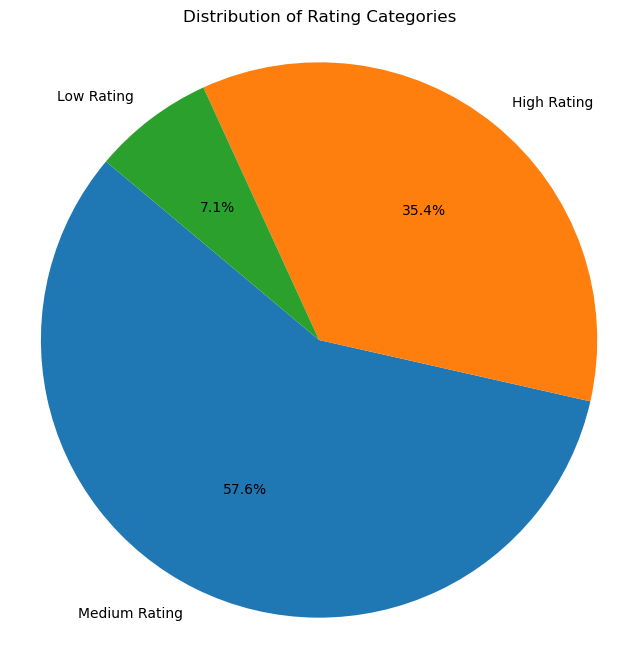

In [30]:
# Count the number of movies in each rating category
rating_category_counts = df['Rating Category'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_category_counts, labels=rating_category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Rating Categories')
plt.show()


In [31]:
df

,Image Link,Name of movie,Year of release,Certificate,Runtime (min),Genre,Rating,MetaScore,Votes,Gross in $,Description,Director,Stars,Cluster,Rating Category
0,https://m.media-amazon.com/images/M/MV5BNDE3OD...,The Shawshank Redemption,1994.0,A,142,Drama,9.3,82.000000,2797507.0,2.834000e+07,"Over the course of several years, two convicts...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",1,High Rating
1,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152,"Action, Crime, Drama",9.0,84.000000,2778489.0,5.348600e+08,When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",1,High Rating
2,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010.0,UA,148,"Action, Adventure, Sci-Fi",8.8,74.000000,2466695.0,2.925800e+08,A thief who steals corporate secrets through t...,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",1,High Rating
3,https://m.media-amazon.com/images/M/MV5BODQ0OW...,Fight Club,1999.0,A,139,Drama,8.8,67.000000,2231343.0,3.703000e+07,An insomniac office worker and a devil-may-car...,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf, Zach Grenier",1,High Rating
4,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994.0,A,154,"Crime, Drama",8.9,95.000000,2145836.0,1.079300e+08,"The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson,...",1,High Rating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,https://m.media-amazon.com/images/M/MV5BOGI3Ym...,The Sixth Man,1997.0,PG-13,107,"Comedy, Drama, Fantasy",5.6,57.249591,6180.0,1.471000e+07,A college athlete returns from the dead to hel...,Randall Miller,"Marlon Wayans, Kadeem Hardison, David Paymer, ...",0,Medium Rating
9796,https://m.media-amazon.com/images/M/MV5BNjFmMT...,Vincere,2009.0,R,128,"Biography, Drama, Romance",6.8,85.000000,5798.0,6.200000e+05,"The story of Mussolini's secret lover, Ida Dal...",Marco Bellocchio,"Giovanna Mezzogiorno, Filippo Timi, Fausto Rus...",0,Medium Rating
9797,https://m.media-amazon.com/images/M/MV5BMTQ5OT...,Die Feuerzangenbowle,1944.0,R,97,Comedy,7.7,57.249591,6415.0,3.358819e+07,"A successful writer, home-schooled in his yout...",Helmut Weiss,"Heinz Rühmann, Karin Himboldt, Hilde Sessak, E...",0,High Rating
9798,https://m.media-amazon.com/images/M/MV5BZjYyZD...,Gloria,1999.0,A,108,"Crime, Drama, Thriller",5.1,26.000000,6090.0,4.160000e+06,After serving three years in prison covering f...,Sidney Lumet,"Sharon Stone, Jean-Luke Figueroa, Jeremy North...",0,Medium Rating


In [34]:
df.to_csv('Movie_Cleaned_Data.csv', index=False)